In [96]:
from sklearn.inspection import permutation_importance
import time 

from Script import *

df_train = pd.read_csv("Data/train.csv")
df_test  = pd.read_csv("Data/test.csv")

df_train = df_train.drop("i", axis=1)
y = df_train.pop("y")
df_train.insert(54,"y", y)
df_test = df_test.drop(["y", "i"], axis = 1)


df_train, df_test = preprocess_data(df_train, df_test, verbose=False)



col_x = list(df_train.filter(like='x', axis=1).columns)
col_c = list(df_train.filter(like='c', axis=1).columns)
col_o = list(df_train.filter(like='o', axis=1).columns)

# df_train = df_train.drop(col_c, axis=1)
# df_test = df_test.drop(col_c, axis=1)



X = df_train.iloc[:, 0:-1]
y = df_train.iloc[:, -1]


# y = y.cat.rename_categories(['no', 'yes'])

In [90]:
df_train.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
c1     0
c2     0
c3     0
c4     0
c5     0
c6     0
c7     0
c8     0
c9     0
c10    0
c11    0
c12    0
o1     0
o2     0
y      0
dtype: int64

In [27]:
df_train[col_x]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,-0.0229,-0.0250,-0.0173,-0.0269,-0.0181,-0.0330,-0.0248,-0.0244,-0.0195,-0.0226,...,-0.0169,-0.0133,-0.1744,-0.0219,-0.0085,0.1027,-1.900400,1.0000,1.0,0.0
1,-0.0110,-0.0173,-0.0226,-0.0183,-0.0264,-0.0191,0.0136,0.0007,-0.0232,-0.0268,...,-0.0169,-0.0133,-0.1744,-0.0219,-0.0085,0.1027,-2.244900,1.0000,1.0,0.0
2,-0.0278,-0.0294,-0.0223,-0.0239,-0.0259,-0.0281,-0.0272,-0.0266,-0.0250,-0.0277,...,-0.0169,-0.0133,-0.1744,-0.0219,-0.0085,0.1027,-2.429100,1.0000,1.0,0.0
3,-0.0292,-0.0309,-0.0233,-0.0248,-0.0276,-0.0296,-0.0274,-0.0270,-0.0269,-0.0296,...,-0.0169,-0.0133,-0.1744,-0.0219,-0.0085,0.1027,-2.429100,1.0000,1.0,0.0
4,-0.0300,-0.0317,-0.0259,-0.0274,-0.0317,-0.0339,-0.0380,-0.0375,-0.0224,-0.0243,...,-0.0169,-0.0133,-0.1744,-0.0219,-0.0085,0.1027,-2.105500,1.0000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,-0.0303,-0.0317,-0.0259,-0.0274,-0.0317,-0.0339,-0.0314,-0.0307,-0.0262,-0.0286,...,-0.0169,-0.0069,2.0060,-0.0219,-0.0085,0.1027,-4.173895,0.7527,1.0,0.0
5828,-0.0189,0.0030,-0.0236,-0.0248,-0.0280,-0.0296,-0.0296,-0.0256,-0.0114,0.0195,...,0.0314,-0.0027,3.9440,11.2800,14.2946,3.5971,-4.173895,0.7802,1.0,0.0
5829,-0.0124,-0.0229,-0.0231,-0.0235,-0.0272,-0.0274,-0.0322,-0.0293,-0.0009,-0.0164,...,-0.0169,-0.0095,2.0060,11.2800,14.2946,3.5971,-4.173895,1.0000,1.0,0.0
5830,-0.0287,-0.0312,-0.0259,-0.0274,-0.0317,-0.0339,-0.0300,-0.0292,-0.0248,-0.0287,...,-0.0169,-0.0133,-0.1744,-0.0219,-0.0085,0.1027,-4.173895,1.0000,1.0,0.0


<AxesSubplot:xlabel='x1'>

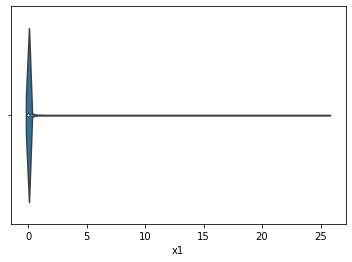

In [37]:
import seaborn as sns
isinstance(df_train, pd.DataFrame)
sns.violinplot(x=df_train.x1)

In [42]:
col_x

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40']

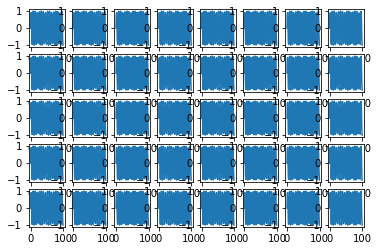

In [52]:
fig1, axs = plt.subplots(5, 8)

col_x[0]

for (column, ax) in zip(col_x, axs.flatten()):
    
    ax.plot(np.arange(0, 100), np.sin(np.arange(0, 100)))

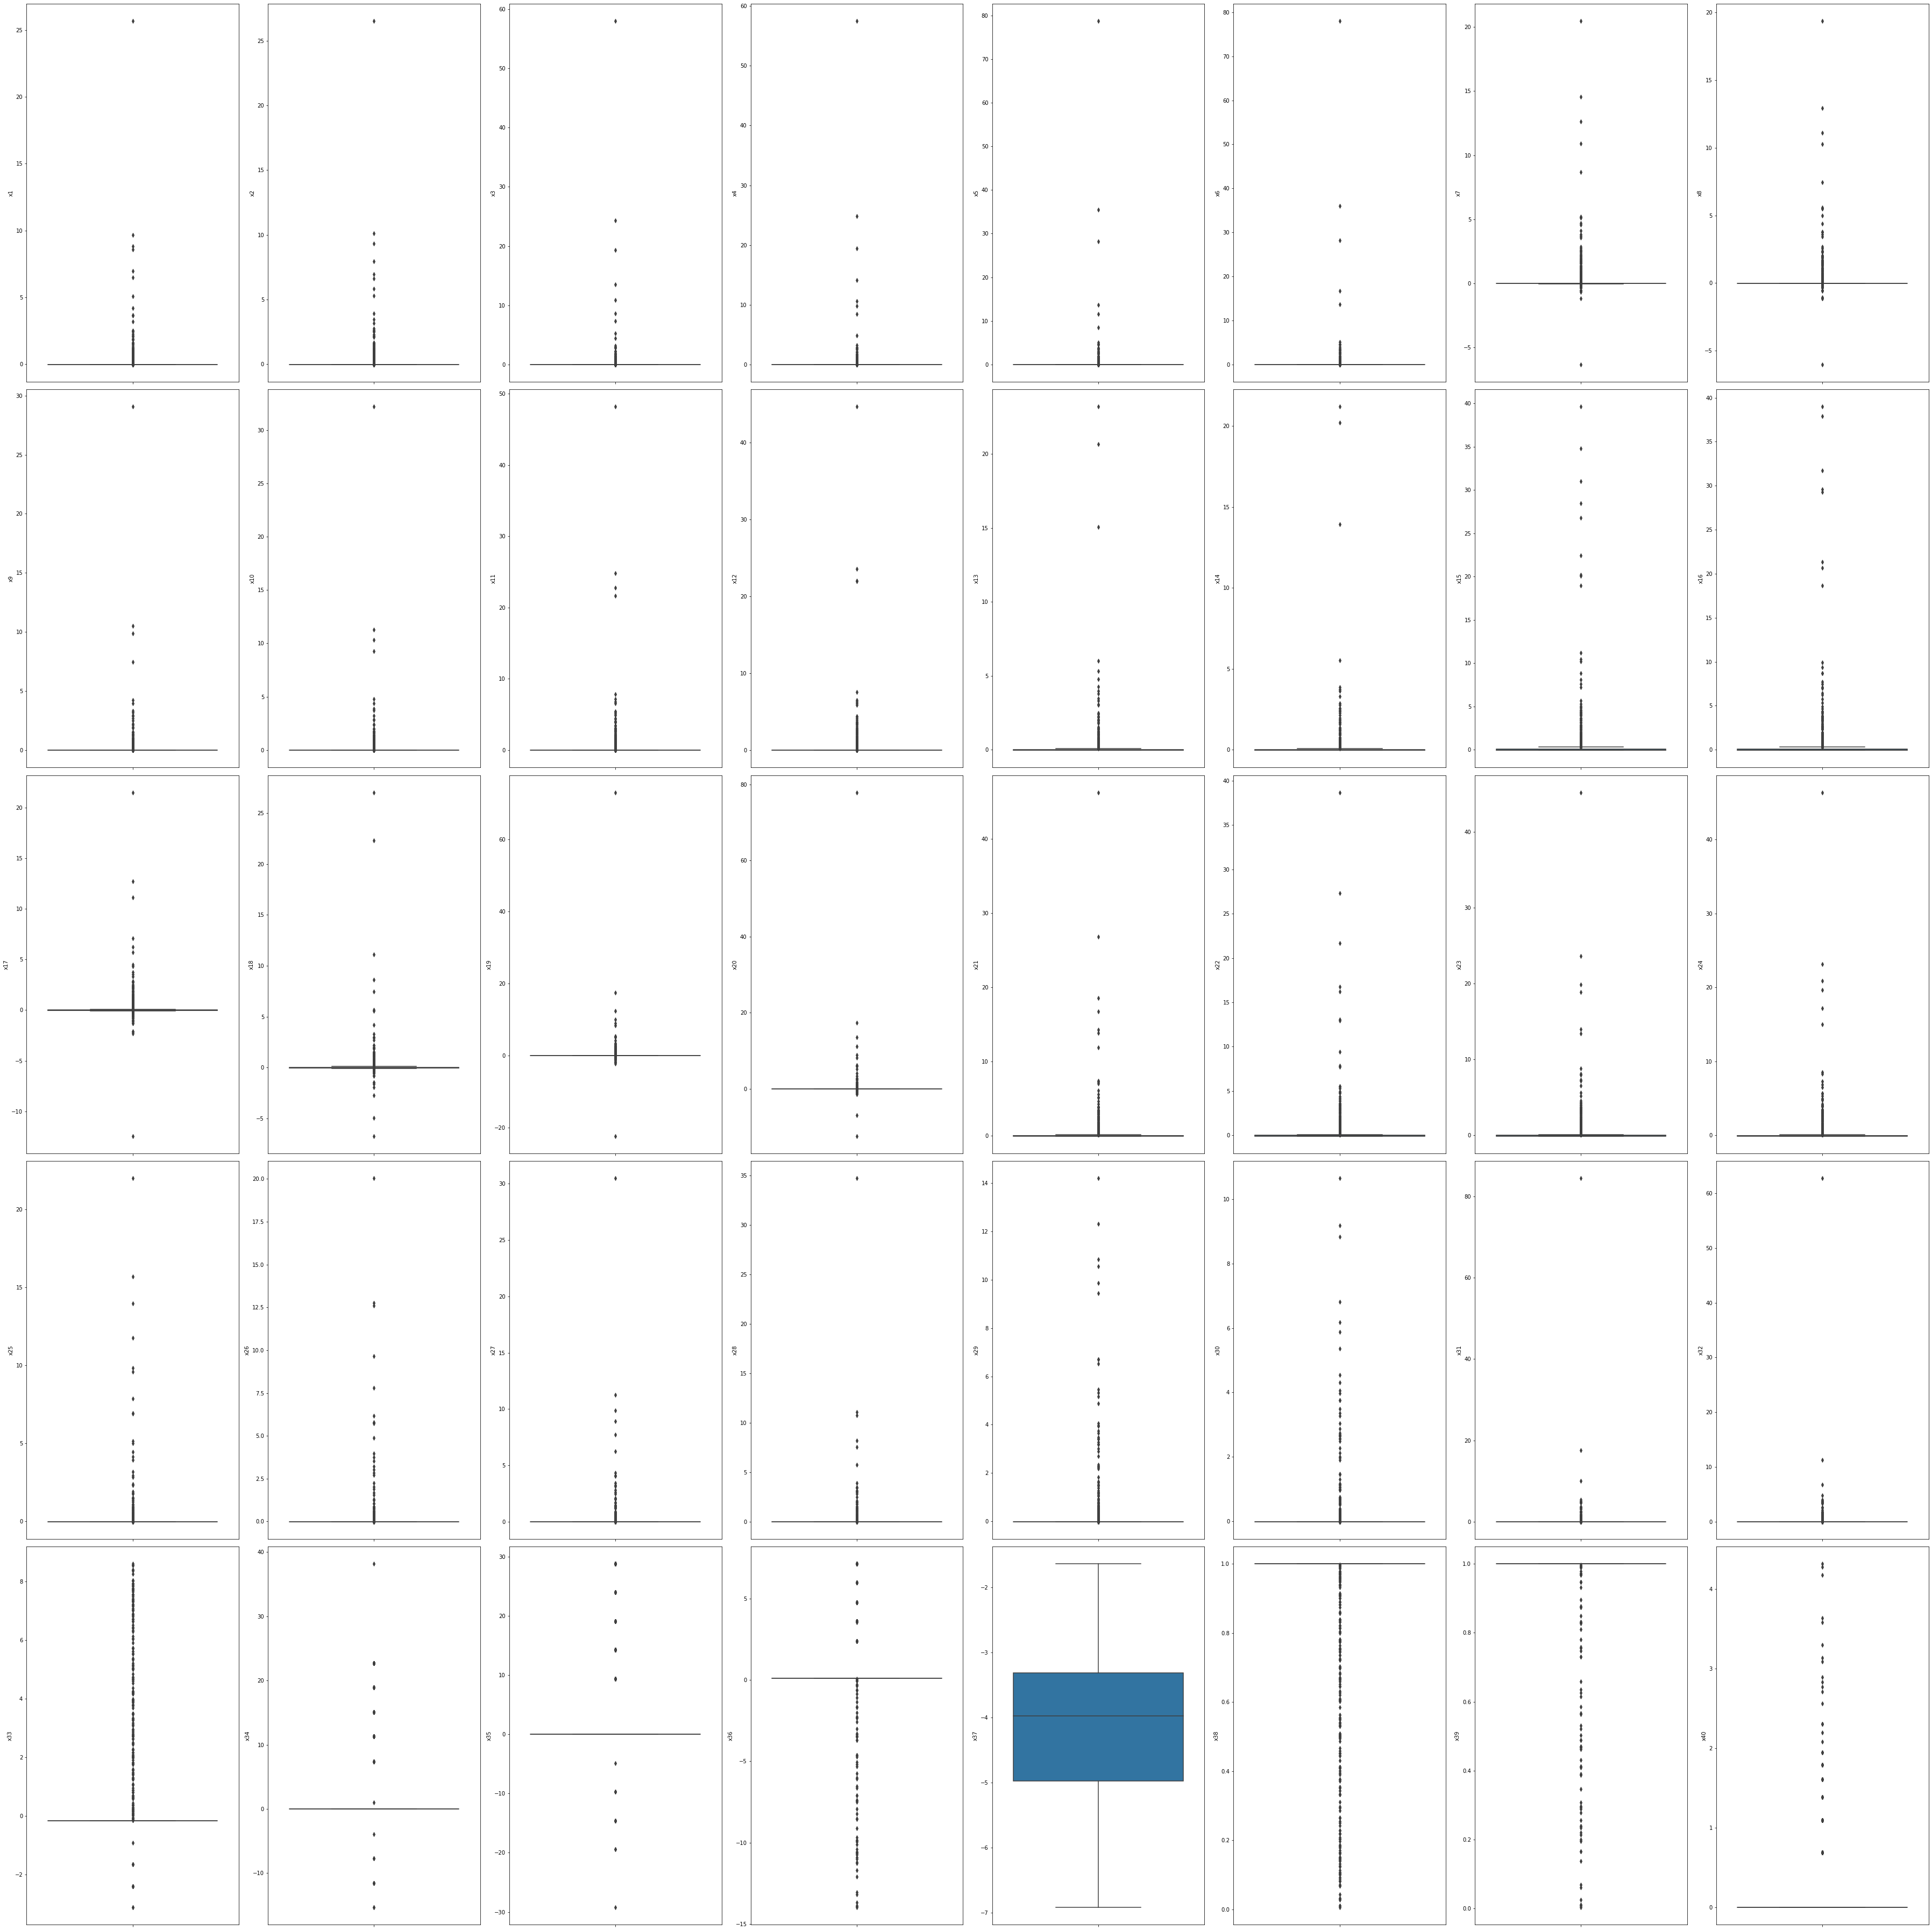

In [63]:
f, axes = plt.subplots(5, 8, figsize=(50, 50))
y = 0
for col in col_x:
    i, j = divmod(y, 8)
    sns.boxplot(y = df_train[col], ax = axes[i,j])
    y = y + 1
plt.tight_layout()

plt.savefig("Images/boxplot_outliers.pdf")
plt.show()


In [130]:
results = []

# SVM WITHOUT OULIERS ONEHOT

In [97]:
from scipy import stats
df_train_NO_OUTLIERS = df_train
aux = df_train[(np.abs(stats.zscore(df_train[col_x])) < 3)]
df_train_NO_OUTLIERS[col_x] = aux[col_x]

for i in col_x:
    df_train_NO_OUTLIERS[i].fillna(value=df_train_NO_OUTLIERS[i].mean(), inplace=True)


In [131]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector





one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

pipe = Pipeline([("onehot", one_hot_encoder), ('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, df_train_NO_OUTLIERS.iloc[:, 0:-1], df_train_NO_OUTLIERS.iloc[:, -1], cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.638031550068587


# SVM with OUTLIERS ONEHOT

In [132]:




one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

pipe = Pipeline([("onehot", one_hot_encoder), ('scaler', StandardScaler()), ('svc', SVC())])

hard_scores = cross_val_score(pipe, X, y, cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6394032921810701


# SVM WITH OUTLIERS NO ONE HOT

In [133]:

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

pipe = Pipeline([ ('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, X, y, cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6678669410150891


# RF WITHOUT OULIERS ONEHOT

In [135]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector





one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

rf = RandomForestClassifier()
pipe = Pipeline([("onehot", one_hot_encoder), ('scaler', StandardScaler()), ('rf', rf)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, df_train_NO_OUTLIERS.iloc[:, 0:-1], df_train_NO_OUTLIERS.iloc[:, -1], cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6795267489711935


# SVM WITHOUT OUTLIERS NO ONEHOT

In [134]:


one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

pipe = Pipeline([ ('scaler', StandardScaler()), ('svc', SVC())])

hard_scores = cross_val_score(pipe, df_train_NO_OUTLIERS.iloc[:, 0:-1], df_train_NO_OUTLIERS.iloc[:, -1], cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6712962962962964


# RF with OUTLIERS ONEHOT

In [136]:


one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

rf = RandomForestClassifier()
pipe = Pipeline([("onehot", one_hot_encoder), ('scaler', StandardScaler()), ('rf', rf)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, X, y, cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6805555555555557


# RF WITH OUTLIERS NO ONE HOT

In [137]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector





one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

rf = RandomForestClassifier()
pipe = Pipeline([ ('scaler', StandardScaler()), ('rf', rf)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, X, y, cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6769547325102881


# RF WITHOUT OUTLIERS NO ONEHOT

In [138]:



one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

rf = RandomForestClassifier()
pipe = Pipeline([ ('scaler', StandardScaler()), ('rf', rf)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, df_train_NO_OUTLIERS.iloc[:, 0:-1], df_train_NO_OUTLIERS.iloc[:, -1], cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6702674897119341


# XGBHIST WITHOUT OULIERS ONEHOT

In [139]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector





one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist = HistGradientBoostingClassifier()
pipe = Pipeline([("onehot", one_hot_encoder), ('scaler', StandardScaler()), ('hist', hist)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, df_train_NO_OUTLIERS.iloc[:, 0:-1], df_train_NO_OUTLIERS.iloc[:, -1], cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6586076817558298


# XGBHIST with OUTLIERS ONEHOT

In [140]:


one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist = HistGradientBoostingClassifier()
pipe = Pipeline([("onehot", one_hot_encoder), ('scaler', StandardScaler()), ('hist', hist)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, X, y, cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.663923182441701


# XGBHIST WITH OUTLIERS NO ONE HOT

In [141]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector





one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist = HistGradientBoostingClassifier()
pipe = Pipeline([ ('scaler', StandardScaler()), ('hist', hist)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, X, y, cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.6664951989026063


# XGBHIST WITHOUT OUTLIERS NO ONEHOT

In [142]:



one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist = HistGradientBoostingClassifier()
pipe = Pipeline([ ('scaler', StandardScaler()), ('hist', hist)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
hard_scores = cross_val_score(pipe, df_train_NO_OUTLIERS.iloc[:, 0:-1], df_train_NO_OUTLIERS.iloc[:, -1], cv=3)

print(hard_scores.mean())
results.append(hard_scores.mean())

0.659122085048011


In [143]:
results

[0.638031550068587,
 0.6394032921810701,
 0.6678669410150891,
 0.6712962962962964,
 0.6795267489711935,
 0.6805555555555557,
 0.6769547325102881,
 0.6702674897119341,
 0.6586076817558298,
 0.663923182441701,
 0.6664951989026063,
 0.659122085048011]

In [ ]:
models = ['svm', 'rf', 'HistXGB']
outliers = ['Y', 'N']
onehot = ['Y', 'N']

for i in models:
    for j in outliers:
        for k in onehot:
            {}

In [3]:
from sklearn.preprocessing import FunctionTransformer
def self_to_one_hot(X):
    transformed_X = to_one_hot(X,X)
    return transformed_X
onehot_pipe  = FunctionTransformer(self_to_one_hot)

In [4]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib 





In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer, make_column_selector

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)



In [7]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib 
# rf_grid_search = joblib.load("Temp/rf_grid_search.joblib")


best_params = {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
rf_best = RandomForestClassifier()
rf_best.set_params(**best_params)


hist = HistGradientBoostingClassifier(random_state=0)



rf_one_hot = hist_one_hot = make_pipeline(
    one_hot_encoder, rf_best
)



hist_one_hot = make_pipeline(
    one_hot_encoder, hist
)



rf_best_one_hot_scores = cross_val_score(rf_one_hot, X, y, cv=5)
xgb_one_hot_scores = cross_val_score(hist_one_hot, X, y, cv=5)


rf_best_scores = cross_val_score(rf_best, X, y, cv=5)
xgb_scores = cross_val_score(hist, X, y, cv=5)


print(rf_best_one_hot_scores.mean(), "\n", rf_best_scores.mean())
print(xgb_one_hot_scores.mean(), "\n", xgb_scores.mean())


0.6822679430478817 
 0.6814113389803355
0.6464341724466863 
 0.6171241443880527


In [8]:



print("Fitting Classifiers")
eclf1 = VotingClassifier(estimators=[
        ('rf_onehot', rf_one_hot), ('xgbhots_onehot', hist_one_hot)], voting='hard')






print("Hard Voting ")
hard_scores = cross_val_score(eclf1, X, y, cv=10)

print("aux stop")

name_of_model = "ALLVARS_ONEHOTALL_rf_best+xgboostHIST"

joblib.dump(hard_scores, "Temp/"+name_of_model+"_hard_scores"+".joblib")


print("hard voting", hard_scores.mean())


print("aux stop")

# joblib.dump(eclf1, "Temp/"+name_of_model+".joblib")

eclf1.fit(X, y)

preds_hard = eclf1.predict(df_test)
save_predictions(preds_hard, "Predictions/"+name_of_model+"_hard")


Fitting Classifiers
Hard Voting 
aux stop
hard voting 0.6838068916092953
aux stop


In [6]:
joblib.load("Temp/rf_best+xgboost_hard_scores.joblib").mean()

0.6808929956060996

In [7]:
joblib.load("Temp/ONEHOTALL_rf_best+xgboostHIST_hard_scores.joblib").mean()


0.6815764585634061

In [8]:


print("Fitting Classifiers")
eclf2 = VotingClassifier(estimators=[
        ('rf_onehot', rf_one_hot), ('xgbhits_onehot', hist_one_hot)], voting='soft')






print("soft Voting ")
soft_scores = cross_val_score(eclf2, X, y, cv=10)

print("aux stop")

name_of_model = "ONEHOTALL_rf_best+xgboostHIST"

joblib.dump(soft_scores, "Temp/"+name_of_model+"_soft_scores"+".joblib")


print("soft voting", soft_scores.mean())


print("aux stop")

# joblib.dump(eclf1, "Temp/"+name_of_model+".joblib")

eclf2.fit(X, y)

preds_soft = eclf2.predict(df_test)
save_predictions(preds_soft, "Predictions/"+name_of_model+"_soft")


Fitting Classifiers
soft Voting 
aux stop
soft voting 0.6558741981719496
aux stop
